<a href="https://colab.research.google.com/github/Liam-Nova/BIT_IA_Bootcamp/blob/main/S4_C2_LAB_Logistic_Regression_Part_1_ipynb2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h2 align="center"> Logistic Regression </h2>

## **Actividad 2**


---


## **Balance de clases**
El balance de las clases se refiere a la ***distribución*** de las clases en un conjunto de datos de clasificación.

Un conjunto de datos está ***balanceado ***cuando las diferentes clases tienen aproximadamente el mismo número de muestras. Si una clase tiene significativamente más ejemplos que otra, se dice que el conjunto de datos está ***desbalanceado.***

Por ejemplo, si estás clasificando si un examen fue aprobado o no, y el 90% de los estudiantes aprobaron mientras solo el 10% fallaron, el conjunto de datos está desbalanceado. Un modelo entrenado en un conjunto de datos desbalanceado tiende a estar sesgado hacia la clase mayoritaria (en este caso, los aprobados), lo que puede llevar a un mal rendimiento en la predicción de la clase minoritaria (los que fallaron).

### **¿Cómo manejarlo?**

**Aumentar la clase minoritaria (Oversampling):**

* SMOTE (Synthetic Minority Over-sampling Technique): Genera ejemplos sintéticos de la clase minoritaria combinando características de los datos existentes.
* Random Oversampling: Duplica aleatoriamente ejemplos de la clase minoritaria hasta que ambas clases tengan tamaños similares.

**Reducir la clase mayoritaria (Undersampling):**

* Random Undersampling: Reduce el tamaño de la clase mayoritaria eliminando ejemplos aleatoriamente hasta igualar el tamaño de la clase minoritaria.

**Recolección de más datos**

**Usar algoritmos adaptados a datos desbalanceados**

* Balanced Random Forest o Class-balanced loss functions

Data set:

* **Test_1:** Puntuación en el primer examen.
* **Test_2:** Puntuación en el segundo examen.
* **Results:** Resultado del examen (0 = Fallido, 1 = Aprobado).

### **Actividad 1. Cargue librerías y datos**
------

In [89]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
plt.style.use("ggplot")
%matplotlib inline

In [90]:
from pylab import rcParams
rcParams['figure.figsize'] = 5,3

### *Tareas A1*

* Cargue los datos 'Classification_Tests.csv' desde su carpeta de drive
* Muestre las 5 pirmeras columnas

In [91]:
from google.colab import drive # Conectanonos con google drive
drive.mount('/content/drive')
import os    # la librería necesaria para la ruta de la carpeta
os.chdir('/content/drive/MyDrive/Colab Notebooks/BIT_Bootcam_IA/DataSET')
#mostar lista de archivos
os.listdir()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


['marketing_campaign.csv',
 'marketing_campaign.xlsx',
 'marketing_extract_2X_Income.xlsx',
 'linear_regression_model (1).pkl',
 'poly_regression_model (1).pkl',
 'auto-mpg.names',
 'auto-mpg.data-original',
 'auto-mpg.data',
 'Index',
 'mpg-limpios-procesados.xlsx',
 'Classification_Tests.csv']

In [92]:
# Cargue los datos
df = pd.read_csv('Classification_Tests.csv')
df.head()

,Test_1,Test_2,Results
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


### **Actividad 2. Descripción del data set**
------

### *Tareas A2*

* Describa los datos (Atributos, registros, rangos, distribuciones)
* ¿Debe aplicar alguna técnica de limpieza?



In [93]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Test_1   100 non-null    float64
 1   Test_2   100 non-null    float64
 2   Results  100 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 2.5 KB


### *Tareas A2*

* Realice un diagrama de barras al target (concluya respecto al balance de las clases)

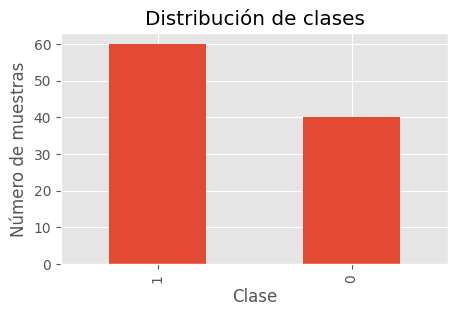

In [94]:
class_counts = df['Results'].value_counts()
class_counts.plot(kind='bar')
plt.xlabel('Clase')
plt.ylabel('Número de muestras')
plt.title('Distribución de clases')
plt.show()

In [95]:
df.head(20)

,Test_1,Test_2,Results
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1
5,45.083277,56.316372,0
6,61.106665,96.511426,1
7,75.024746,46.554014,1
8,76.098787,87.420570,1
9,84.432820,43.533393,1


In [96]:
resultado_Test1 = df['Results'][df['Test_1'] > 85]
resultado_Test1


,Results
10,0
21,1
27,0
31,1
42,1
47,1
49,1
51,1
52,1
56,1


### **Actividad 3: Construya un diagrama de las clases de data set**
---

### *Tareas A3*

Las siguientes líneas de código grafican el diagrama de dispersión (scatter) de los datos de los que no aprobaron

* Ingresa la línea de código para que gráfique la clase que si aprobó con un triangulo verde
*  Complete los títulos de la gra´fica y los ejes

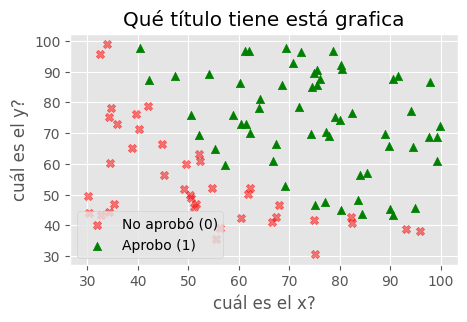

In [97]:
target = df['Results']

plt.scatter(df['Test_1'][target == 0], df['Test_2'][target== 0], alpha=0.5, label='No aprobó (0)', marker='X', color='red')
plt.scatter(df['Test_1'][target == 1], df['Test_2'][target == 1], alpha=1, label='Aprobo (1)', marker='^', color='green')

plt.title('Qué título tiene está grafica')
plt.xlabel('cuál es el x?')
plt.ylabel('cuál es el y?')
plt.legend()
plt.grid(True)
plt.show()

### **Actividad 4: Defina una función para calcular la función sigmoid**
---

$$ h(z) = \frac{1}{1+e^{-z}}$$

In [98]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

### *Tareas A4*

En clases pasadas desarrollamos la función de para en cálculo de la sigmoid

* Copia la función y grafica en un rango de -10 a 10
* Describa la función sigmoid
* Cuál es el rango de la función sigmoid? Es decir en qué valores existe la función?

### Actividad 5: Cálculo de la función de costos $J(\theta)$
---

El objetivo de la regresión log´stica es minimizar la función de costo

$$J(\theta) = -\frac{1}{m} \sum_{i=1}^{m} [ y^{(i)}log(h_{\theta}(x^{(i)})) + (1 - y^{(i)})log(1 - (h_{\theta}(x^{(i)}))]$$

donde el gradiente de la función de costo está dado por

$$ \frac{\partial J(\theta)}{\partial \theta_j} = \frac{1}{m} \sum_{i=1}^{m} (h_{\theta}(x^{(i)}) - y^{(i)})x_j^{(i)}$$

### *Tareas A5*

* Contruya una función para calcular la función de costo
* Construya una gráfica con plot(h,y) para graficar la función de costo.
1. Genere un vector de datos con todos los posibles valores de h
2. Grafique un plot cuando  y = 0
3. Grafique un plot cuando  y = 1

* Concluya

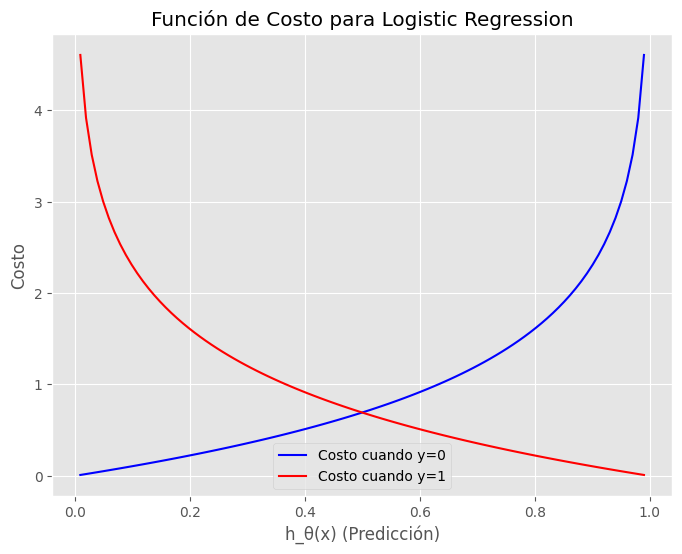

In [99]:
# Definir la función de costo para logistic regression
def cost_function(h, y):
    h = np.clip(h, 1e-10, 1 - 1e-10)  # Avoid log(0)
    return -y * np.log(h) - (1 - y) * np.log(1 - h)

# Crear valores de h (predicción) desde casi 0 hasta casi 1
h_values = np.linspace(0.01, 0.99, 100)

# Calcular el costo para y=0 y y=1
cost_for_y0 = cost_function(h_values, 0)
cost_for_y1 = cost_function(h_values, 1)

# Graficar las funciones de costo
plt.figure(figsize=(8, 6))
plt.plot(h_values, cost_for_y0, label='Costo cuando y=0', color='blue')
plt.plot(h_values, cost_for_y1, label='Costo cuando y=1', color='red')
plt.title('Función de Costo para Logistic Regression')
plt.xlabel('h_θ(x) (Predicción)')
plt.ylabel('Costo')
plt.legend()
plt.grid(True)
plt.show()

### Actividad 6: Actualización de los parámetros $(\theta)$
---

Modificar la fucnión desarrolladas en RGD para ajustarla a la hipotesisi de la Reg logistica


El objetivo del **gradiente descendente** es minimizar la **función de costo** ajustando los parámetrosdata:image/png;base64,

In [100]:
from statsmodels.tools.tools import add_constant

In [101]:
# Fuente del codigo original



def my_RLog(X,Y,alpha,theta,n_iteraciones):
  m = len(Y) #Se calcila el numero de registro (ejemplos de entrenamiento) y se guardan en m
  Y = np.reshape(Y,(-1,1))
  # Se reemplaza cost_history = np.zeros(n_iteraciones)
  # Por

  cost_history =[]

# Que hago para guardar el valor del costo
 # cost_history.append(cost)


  for i in range(n_iteraciones):
    # H = sigmo de (z) =1 / (1 + exp(-(t0+t1X1+t2X2)))
    H = sigmoid(np.dot(X,theta))

  # Actualización de paramatero
    # theta = theta - alpha * (1/m) * np.dot(X1.T,(H-Y))
    theta -=  alpha * (1/m) * np.dot(X1.T,(H-Y)) # es la formula de arriba pero mas resumida

    # Llamando la función que calculael del costo
    # cost_history[i] = cost_function(H,Y)
    cost= cost_function(H,Y)






    # Guarda los valores del costo en la iteracion i-ésima
    # cost_history[i] = cost_function(H,Y)
    cost_history.append(cost)
    # cost_history.append(cost_function(H,Y))

  return theta, cost_history

### Actividad 7: Entrenamiento
---

* Definifir los atributos y objetivo
* Modelar los atributos con la componente de unos para $(\theta_0)$ (**bias**)
* Definir hiperparámetros
* Fit ( Entrenar) en con la función de la actividad 6

In [104]:
Y = df['Results'] # Target
X = df[['Test_1','Test_2']] # Atributos
# X = add_constant(X) # Agregar unos pata theta_0
# X =np.c_[A,B] : concatena A,B
X = np.c_[np.ones((X.shape[0],1)),X]
alpha = 0.01
n_iteraciones = 1000

In [105]:
theta = np.random.randn(3,1)
print('Parámetros iniciales')
print(theta)

Parámetros iniciales
[[-0.75165057]
 [ 0.41161176]
 [-0.22706727]]


In [106]:
theta, cost_history = my_RLog(X,Y,alpha,theta,n_iteraciones)
print('Parámetros finales')
print(theta)

Parámetros finales
[[-1.51620969]
 [ 0.57265516]
 [ 0.11430095]]


In [107]:
theta, cost_history = my_RLog(X,Y,alpha,theta,n_iteraciones)
print('Parámetros finales')
print(theta)

Parámetros finales
[[-2.28754607]
 [ 0.37044223]
 [-0.09808065]]


In [108]:
len(cost_history)

1000

In [109]:
def predict(X, theta):
  H = sigmoid(np.dot(X, theta))
  return H

In [111]:
H = predict(X, theta)
np.c_[H,Y]

array([[0.94714035, 0.        ],
       [0.99030767, 0.        ],
       [0.97899062, 0.        ],
       [0.99999028, 1.        ],
       [1.        , 1.        ],
       [0.99986221, 0.        ],
       [0.99998123, 1.        ],
       [1.        , 1.        ],
       [0.99999997, 1.        ],
       [1.        , 1.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [1.        , 1.        ],
       [0.99999901, 1.        ],
       [0.99261861, 0.        ],
       [0.99987107, 1.        ],
       [0.99999999, 1.        ],
       [0.99999999, 0.        ],
       [0.99999962, 1.        ],
       [1.        , 1.        ],
       [0.99999999, 0.        ],
       [1.        , 1.        ],
       [0.9999912 , 0.        ],
       [0.99764756, 0.        ],
       [1.        , 1.        ],
       [0.9999991 , 1.        ],
       [1.        , 1.        ],
       [1.        , 0.        ],
       [0.99999985, 0.        ],
       [0.99668354, 0.        ],
       [0.

### Task 6: Cost and Gradient at Initialization
---

### Task 7: Gradient Descent
---

Minimize the cost function $J(\theta)$ by updating the below equation and repeat until convergence
$\theta_j := \theta_j - \alpha \frac{\partial J(\theta)}{\partial \theta_j}$ (simultaneously update $\theta_j$ for all $j$)

### Task 8: Plotting the Convergence of $J(\theta)$
---

Plot $J(\theta)$ against the number of iterations of gradient descent:

### Task 9: Plotting the decision boundary
---

$h_\theta(x) = \sigma(z)$, where $\sigma$ is the logistic sigmoid function and $z = \theta^Tx$

When $h_\theta(x) \geq 0.5$ the model predicts class "1":

$\implies \sigma(\theta^Tx) \geq 0.5$

$\implies \theta^Tx \geq 0$ predict class "1"

Hence, $\theta_1 + \theta_2x_2 + \theta_3x_3 = 0$ is the equation for the decision boundary, giving us

$ x_3 = \frac{-(\theta_1+\theta_2x_2)}{\theta_3}$

### Task 10: Predictions using the optimized $\theta$ values
---

$h_\theta(x) = x\theta$